In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ankita_new.csv', low_memory=False)
df.head(3)

,Unnamed: 0.1,Unnamed: 0,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,303829,303829,571112390,9,['457790'],US,en-GB,"[{'count': '83', 'name': 'to-read'}, {'count':...",NaN,False,...,1.0,NaN,2000.0,https://www.goodreads.com/book/show/880312.Plenty,https://images.gr-assets.com/books/1335827421m...,880312.0,127.0,1257151.0,Plenty,Plenty
1,303830,303830,1844548848,3,[],US,NaN,"[{'count': '25', 'name': 'to-read'}, {'count':...",NaN,False,...,5.0,NaN,2010.0,https://www.goodreads.com/book/show/6839967-th...,https://images.gr-assets.com/books/1328726938m...,6839967.0,16.0,2757584.0,"The Beast: Singing With Iron Maiden—The Drugs,...","The Beast: Singing With Iron Maiden—The Drugs,..."
2,303831,303831,1608190064,9,[],US,en-US,"[{'count': '772', 'name': 'to-read'}, {'count'...",NaN,False,...,NaN,NaN,NaN,https://www.goodreads.com/book/show/6419271-fa...,https://s.gr-assets.com/assets/nophoto/book/11...,6419271.0,91.0,4322145.0,"Family of Secrets: The Bush Dynasty, America's...","Family of Secrets: The Bush Dynasty, America's..."


In [3]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [4]:
df.shape

(101276, 29)

In [38]:
df.columns

Index(['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin',
       'similar_books', 'description', 'format', 'link', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year', 'url',
       'image_url', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series'],
      dtype='object')

In [39]:
df.dtypes

isbn                     object
text_reviews_count        int64
series                   object
country_code             object
language_code            object
popular_shelves          object
asin                    float64
is_ebook                   bool
average_rating          float64
kindle_asin              object
similar_books            object
description              object
format                   object
link                     object
authors                  object
publisher                object
num_pages               float64
publication_day         float64
isbn13                   object
publication_month       float64
edition_information      object
publication_year        float64
url                      object
image_url                object
book_id                 float64
ratings_count           float64
work_id                 float64
title                    object
title_without_series     object
dtype: object

In [40]:
df['publication_day'] = pd.to_numeric(df['publication_day'], errors='coerce').astype('Int64')  
df['publication_month'] = pd.to_numeric(df['publication_month'], errors='coerce').astype('Int64')
df['publication_year'] = pd.to_numeric(df['publication_year'], errors='coerce').astype('Int64')

df['isbn'] = pd.to_numeric(df['isbn'], errors='coerce')  
df['isbn13'] = pd.to_numeric(df['isbn13'], errors='coerce')  

df['asin'] = df['asin'].fillna('').astype(str)  
df['book_id'] = df['book_id'].fillna('').astype(str)  

df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce').astype('Int64')  
df['ratings_count'] = pd.to_numeric(df['ratings_count'], errors='coerce').astype('Int64')  

df['work_id'] = df['work_id'].fillna('').astype(str)  

In [41]:
num_col = df.select_dtypes(include=['number'])
num_col.describe()

,isbn,text_reviews_count,average_rating,num_pages,publication_day,isbn13,publication_month,publication_year,ratings_count
count,9.239400e+04,101276.000000,101276.000000,85961.0,81822.0,9.888400e+04,84852.0,91711.0,101276.0
mean,1.648510e+09,44.386745,3.870882,334.219821,11.172961,9.771145e+12,6.43227,2005.829846,579.305334
std,2.371060e+09,549.212387,0.338074,189.202173,10.06757,3.103170e+11,3.405206,105.19684,14693.572544
min,0.000000e+00,0.000000,0.000000,0.0,1.0,9.781850e+05,1.0,16.0,0.0
25%,4.250617e+08,2.000000,3.680000,232.0,1.0,9.780399e+12,4.0,2001.0,11.0
50%,8.129767e+08,6.000000,3.890000,320.0,8.0,9.780809e+12,6.0,2008.0,35.0
75%,1.590201e+09,17.000000,4.090000,403.0,19.0,9.781578e+12,9.0,2012.0,120.0
max,1.000000e+10,77448.000000,5.000000,12200.0,31.0,9.879798e+12,12.0,20091.0,3255518.0


In [42]:
missing_values = df.isnull().sum()
print(missing_values)

isbn                     8882
text_reviews_count          0
series                      0
country_code                0
language_code           58385
popular_shelves             0
asin                        0
is_ebook                    0
average_rating              0
kindle_asin             47505
similar_books               0
description                 0
format                  10159
link                        0
authors                     0
publisher                9725
num_pages               15315
publication_day         19454
isbn13                   2392
publication_month       16424
edition_information     93659
publication_year         9565
url                         0
image_url                   0
book_id                     0
ratings_count               0
work_id                     0
title                       0
title_without_series        0
dtype: int64


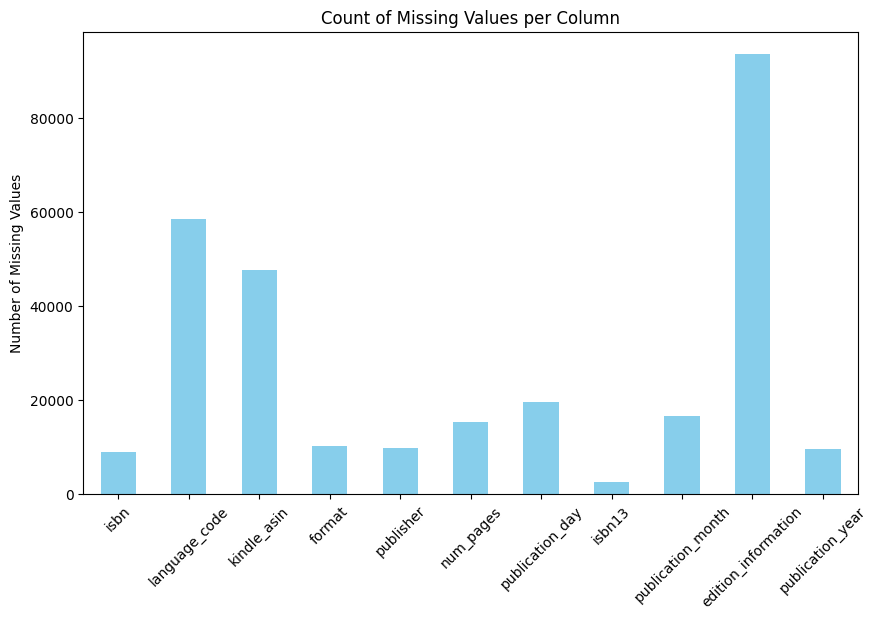

In [43]:
missing_values_filtered = missing_values[missing_values > 0]
plt.figure(figsize=(10, 6))
missing_values_filtered.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

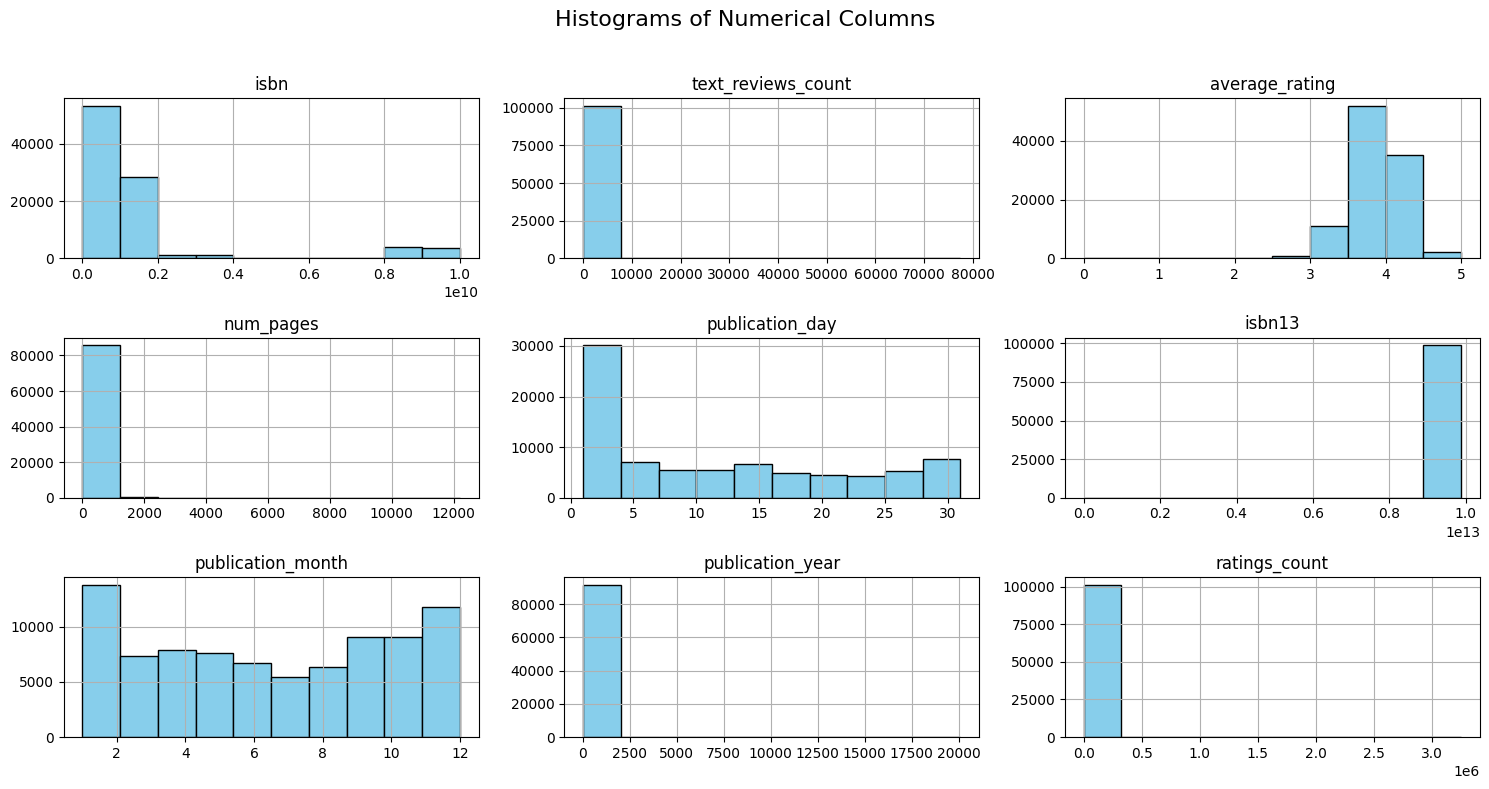

In [44]:
num_col.hist(figsize=(15, 8), bins=10, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

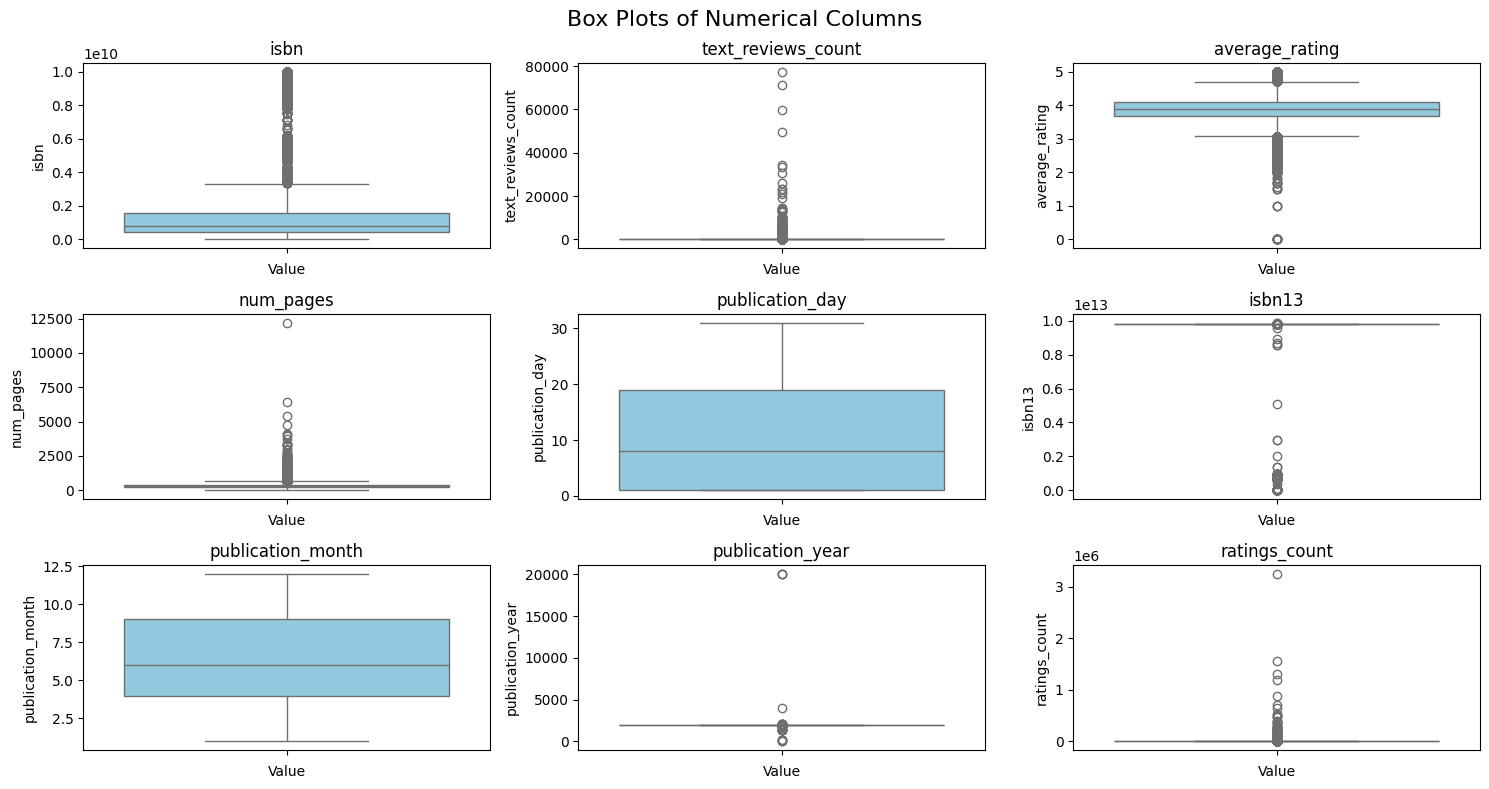

In [45]:
plt.figure(figsize=(15, 8))
num_cols = num_col.shape[1]
nrows = (num_cols // 3) + (num_cols % 3 > 0)  

for i, column in enumerate(num_col.columns, 1):
    plt.subplot(nrows, 3, i)  
    sns.boxplot(data=num_col[column], color='skyblue')
    plt.title(column)
    plt.xlabel('Value')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.suptitle('Box Plots of Numerical Columns', fontsize=16)
plt.show()

In [46]:
cat_col = df.select_dtypes(include=['object'])
counts = {col: df[col].nunique() for col in cat_col.columns}
counts_df = pd.DataFrame(list(counts.items()), columns=['Column', 'Unique Values'])
print(counts_df)

                  Column  Unique Values
0                 series          15103
1           country_code              1
2          language_code             73
3        popular_shelves          78273
4                   asin              1
5            kindle_asin          42214
6          similar_books          37837
7            description          94408
8                 format            139
9                   link         101276
10               authors          57341
11             publisher          12475
12   edition_information           2801
13                   url         101276
14             image_url          60390
15               book_id         101276
16               work_id          72764
17                 title          85172
18  title_without_series          85172


In [47]:
unique_counts = {col: df[col].nunique() for col in df.columns}
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Values'])
print(unique_counts_df)

                  Column  Unique Values
0                   isbn          92394
1     text_reviews_count           1349
2                 series          15103
3           country_code              1
4          language_code             73
5        popular_shelves          78273
6                   asin              1
7               is_ebook              2
8         average_rating            286
9            kindle_asin          42214
10         similar_books          37837
11           description          94408
12                format            139
13                  link         101276
14               authors          57341
15             publisher          12475
16             num_pages           1289
17       publication_day             31
18                isbn13          98884
19     publication_month             12
20   edition_information           2801
21      publication_year            131
22                   url         101276
23             image_url          60390


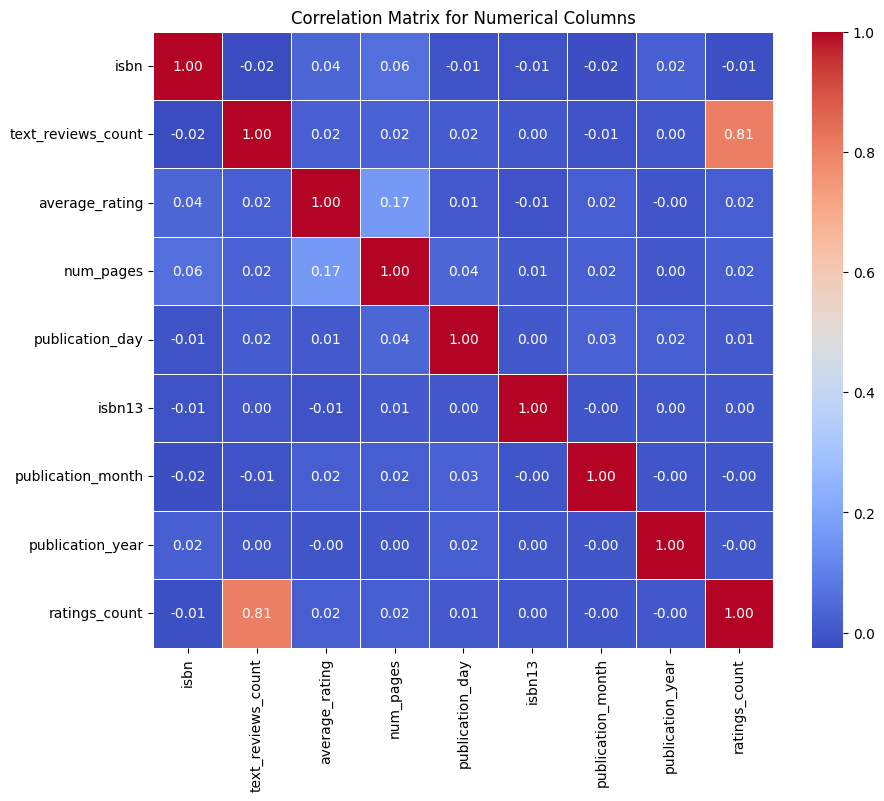

In [48]:
correlation_matrix = num_col.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

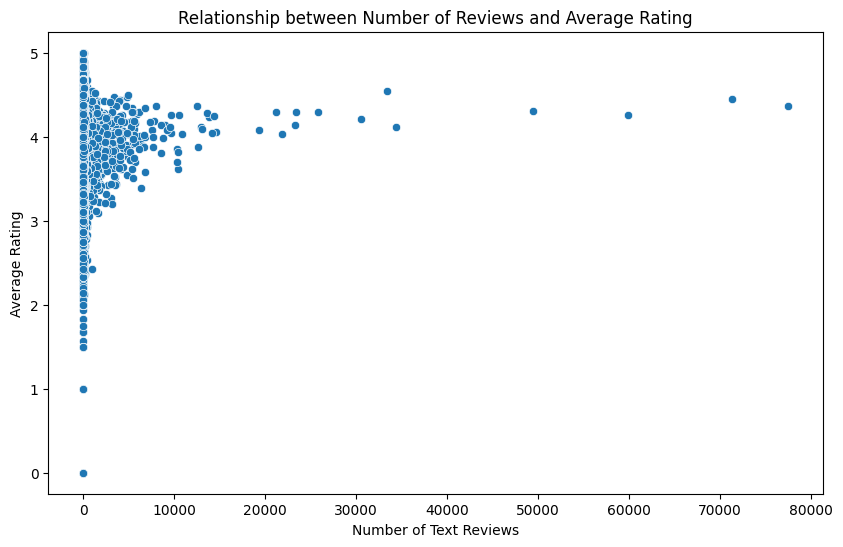

Correlation between text_reviews_count and average_rating: 0.02


In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_reviews_count', y='average_rating', data=df)
plt.xlabel('Number of Text Reviews')
plt.ylabel('Average Rating')
plt.title('Relationship between Number of Reviews and Average Rating')
plt.show()

correlation = df['text_reviews_count'].corr(df['average_rating'])
print(f"Correlation between text_reviews_count and average_rating: {correlation:.2f}")

In [50]:
print(df.loc[0, 'popular_shelves'])

[{'count': '83', 'name': 'to-read'}, {'count': '19', 'name': 'plays'}, {'count': '10', 'name': 'drama'}, {'count': '5', 'name': 'theatre'}, {'count': '4', 'name': 'play'}, {'count': '2', 'name': 'to-read-plays'}, {'count': '2', 'name': 'default'}, {'count': '2', 'name': 'currently-reading'}, {'count': '2', 'name': 'fiction'}, {'count': '2', 'name': '20th-century'}, {'count': '2', 'name': 'favorites'}, {'count': '1', 'name': 'plays-read'}, {'count': '1', 'name': 'history-europe'}, {'count': '1', 'name': 'history-britain'}, {'count': '1', 'name': 'hare'}, {'count': '1', 'name': 'english-countryside'}, {'count': '1', 'name': 'checking-privilege'}, {'count': '1', 'name': 'brit-lit'}, {'count': '1', 'name': 'world-war-two'}, {'count': '1', 'name': 'uk-and-ireland'}, {'count': '1', 'name': 'spies'}, {'count': '1', 'name': 'drama-film-plays-psychodrama'}, {'count': '1', 'name': 'contemporary'}, {'count': '1', 'name': 'in-my-library'}, {'count': '1', 'name': 'spring-2016'}, {'count': '1', 'nam

In [51]:
import ast
from collections import Counter

def extract_shelves(shelves_entry):
    try:
        shelves = ast.literal_eval(shelves_entry)
        return [(shelf['name'], int(shelf['count'])) for shelf in shelves]
    except (ValueError, SyntaxError):
        return []

df['shelves_list'] = df['popular_shelves'].apply(extract_shelves)

all_shelves = [(shelf, count) for sublist in df['shelves_list'] for shelf, count in sublist]

shelf_counter = Counter()
for shelf, count in all_shelves:
    shelf_counter[shelf] += count

shelf_counts_df = pd.DataFrame(shelf_counter.items(), columns=['Shelf', 'Total Count']).sort_values(by='Total Count', ascending=False)
print(shelf_counts_df.head(10))

                  Shelf  Total Count
0               to-read    351268599
7     currently-reading     19119630
10            favorites     11543286
69   historical-fiction      9873618
604            classics      8730236
8               fiction      6749576
84          non-fiction      4567020
83              history      3683186
174          historical      3224922
41                owned      2601372


C:\Users\Dell\AppData\Local\Temp\ipykernel_6884\2355915119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Count', y='Shelf', data=shelf_counts_df.head(10), palette='coolwarm')


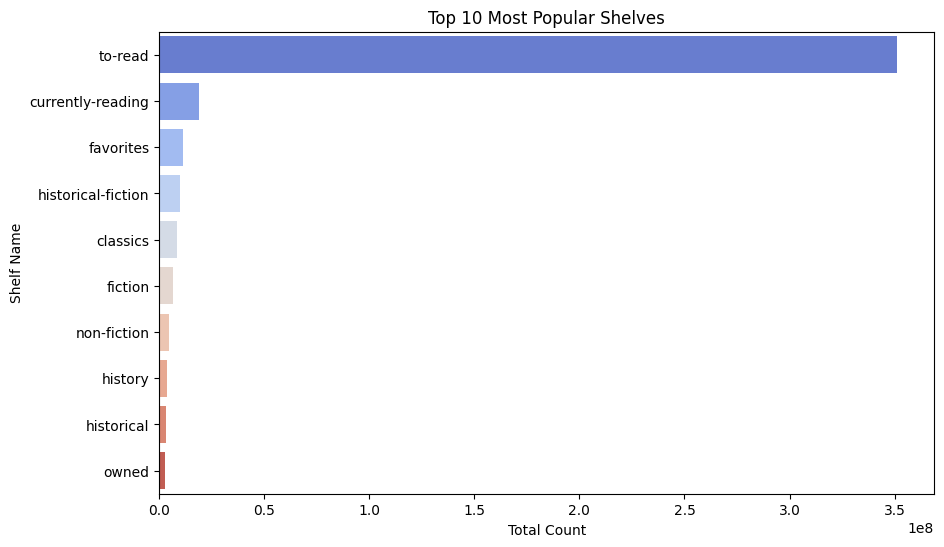

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Count', y='Shelf', data=shelf_counts_df.head(10), palette='coolwarm')
plt.xlabel('Total Count')
plt.ylabel('Shelf Name')
plt.title('Top 10 Most Popular Shelves')
plt.show()

In [53]:
df['description_length'] = df['description'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
df['title_length'] = df['title'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
df['title_without_series_length'] = df['title_without_series'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

top_descriptions = df[['title', 'description_length']].sort_values(by='description_length', ascending=False).head(8)
print(top_descriptions)

                                                   title  description_length
8275   The All-True Travels and Adventures of Lidie N...                8192
46879                            The Pentagon: A History                8192
7170                     Fear (The Arbat Trilogy, Vol 2)                8192
66207  The Last Pharaoh: Mubarak and the Uncertain Fu...                8192
85476  Revolusi Agustus: Kesaksian Seorang Pelaku Sej...                8192
44063  Team of Rivals: The Political Genius of Abraha...                8192
19922  The History of Christianity: From the Disciple...                8192
82835               Weimar: A Cultural History 1918-1933                8192


In [54]:
df.duplicated(subset=['title']).sum()

16104

In [55]:
def convert_to_string(value):
    if isinstance(value, (list, tuple)):
        return ', '.join(map(str, value))
    return str(value)

for col in df.columns:
    df[col] = df[col].apply(convert_to_string)

duplicates_all = df[df.duplicated(keep=False)]

print(duplicates_all.shape[0]) 

0


In [58]:
correlation = df['isbn'].corr(df['book_id'])
print(f'Correlation between ISBN and Book ID: {correlation}')

Correlation between ISBN and Book ID: 0.19862350120512903
